In [1]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from utilities.constants import CLASSIFICATION_CMAP, CLASSIFICATION_NAMES

In [2]:
file = './data/backup_classification.tif'
with rasterio.open(file) as src:
    meta = src.meta
    classification = src.read(1)

print(classification.shape)

(2160, 4320)


In [3]:
# Find the areas where the classification transitions from one class to another and mark them as 0
# This is done to make the classification map more readable by defining the boundaries between classes

classification_boundaries = np.zeros(classification.shape)
for i in range(1, classification.shape[0]):
    for j in range(1, classification.shape[1]):
        if classification[i, j] != classification[i - 1, j]:
            classification_boundaries[i, j] = 1
        if classification[i, j] != classification[i, j - 1]:
            classification_boundaries[i, j] = 1

# Use this to mask out the areas where the classification transitions from one class to another
classification = np.ma.masked_where(classification_boundaries == 1, classification)

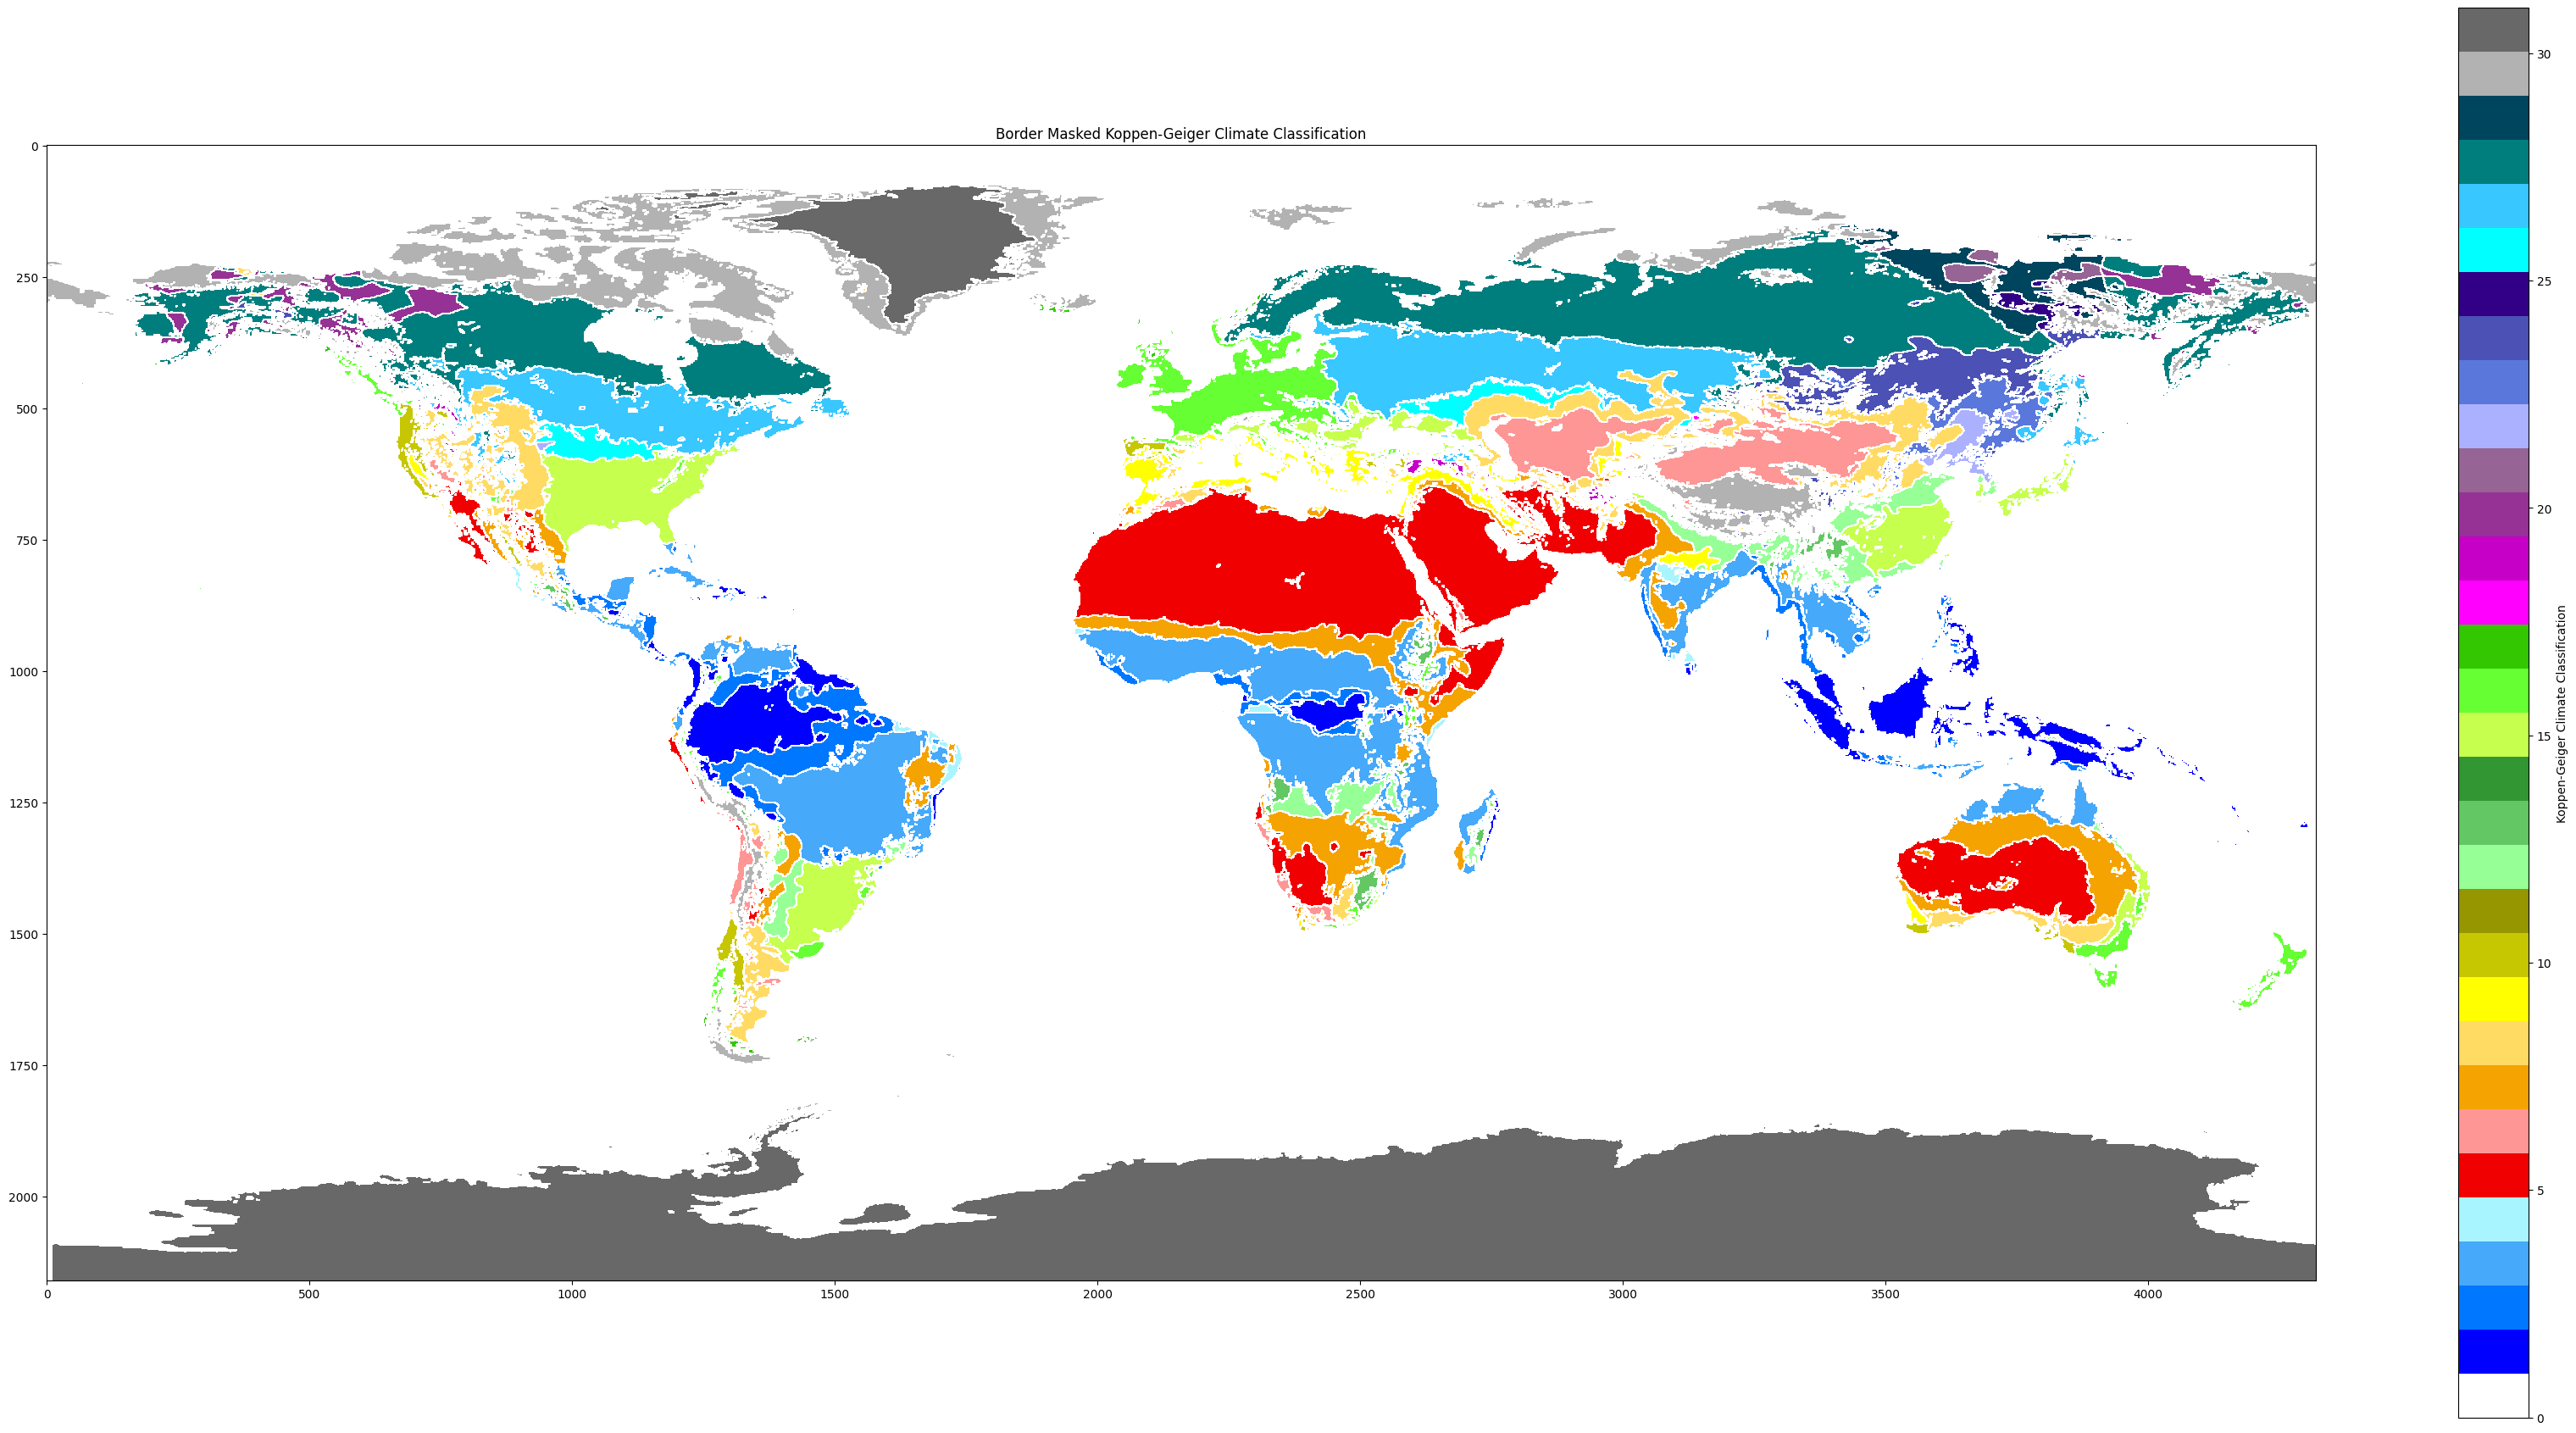

In [5]:
plt.figure(figsize=(classification.shape[1] / 100, classification.shape[0] / 100), dpi=100)
plt.title('Border Masked Koppen-Geiger Climate Classification')
plt.imshow(classification, cmap=CLASSIFICATION_CMAP)
cbar = plt.colorbar(ticks=range(len(CLASSIFICATION_NAMES)), label='Koppen-Geiger Climate Classification')
cbar.ax.set_yticklabels(CLASSIFICATION_NAMES)
cbar.ax.set_yscale('linear')

plt.savefig('classification.png', bbox_inches='tight', pad_inches=0.1, dpi=100)
plt.show()